In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# import waterfall_chart

""" This does not import on all out devices. Try some other way to get graph """

' This does not import on all out devices. Try some other way to get graph '

In [4]:
#print head of cleaned dataset
DatabaseDF = pd.read_csv("../CleanedDataset.csv")
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


## Waterfall Chart

### Definition

A waterfall chart is used mainly in Business to show how a value is affected positively or negatively over a certain period of time. The graph shows the cumulative affect on a certain variable/feature. It displays each change with bar graph with how much the value has increased or decreased relatively to the last value.

For example, we can use a waterfall chart to display how the oil production changes by comparinng the values of BOPD for the first month, the third month, the six month, and so on until the twelfth month. For each time interval, we can compare the best BOPD value at the end of each interval and how it fluctuates.

### Compare how the BOPD values changes over time

In [5]:
#List with different variables that are being compared
time_intervals = ['Best1 Mo BOPD', 'Best3 Mo BOPD', 'Best6 Mo BOPD', 'Best9 Mo BOPD', 'Best12 Mo BOPD']

In [6]:
#Calculate total oil production values for each time interval
best_bopd = []
for i in time_intervals:
    sum_column = np.sum(DatabaseDF[i].fillna(0).values)
    best_bopd.append(sum_column)

In [11]:
#Print graph
a = time_intervals
b = best_bopd
my_plot = waterfall_chart.plot(a, b, rotation_value = 90, sorted_value = True, threshold = 0.2, formatting = "{:,.1f}", net_label = "Cumulative Production", other_label = "extra", Title = "Cumulative Oil Production", x_lab = "Month", y_lab = "Oil Production", blue_color = "blue", green_color = "#95FF24", red_color = 'r')

# should you compare data better together

IndentationError: unexpected indent (<ipython-input-11-d1714c877299>, line 2)

### Find which formations are related to higher oil production values.

In [8]:
#Print out formation names
DatabaseDF['Formation'].unique()

array(['MBH', 'TFH', 'MBH/TFH', 'TF2', 'TF4', 'TF3', nan, 'UTFH', 'TF1',
       'MTFH', 'TFSH', 'TF2.5'], dtype=object)

In [9]:
#Functionn to calculate oil production values.
formation_list = ['MBH', 'TFH', 'MBH/TFH', 'TF2', 'TF4', 'TF3', 'zero', 'UTFH', 'TF1',
       'MTFH', 'TFSH', 'TF2.5']

def oil_prod(value, feature1, feature2):
    count = 0
    oil_production = 0
    num_rows = len(DatabaseDF.index) 
    for item in range(num_rows - 1):
        if DatabaseDF.at[item, feature1] == value:
            count += 1
            oil_production += DatabaseDF.at[item, feature2]
    return oil_production

In [12]:
#Use function to calculate values for each formation.
"""total_oilprod = []
for i in formation_list:
    total_oilprod.append(oil_prod(i, 'Formation', '12 month Cum Prod'))"""

    '""As mentioned after, looking into other resources to invest in like costs'

In [12]:
#Print graph
a = formation_list
b = total_oilprod
my_plot = waterfall_chart.plot(a, b, rotation_value = 90, sorted_value = True, threshold = 0.2, formatting = "{:,.1f}", net_label = "Cumulative Production", other_label = "extra", Title = "Cumulative Oil Production", x_lab = "Formation", y_lab = "Oil Production", blue_color = "blue", green_color = "#95FF24", red_color = 'r')

# This is a good code to help understand the data in difference with categorical data would continue with this model

' a = formation_list\nb = total_oilprod\nmy_plot = waterfall_chart.plot(a, b, rotation_value = 90, sorted_value = True, threshold = 0.2, formatting = "{:,.1f}", net_label = "Cumulative Production", other_label = "extra", Title = "Cumulative Oil Production", x_lab = "Formation", y_lab = "Oil Production", blue_color = "blue", green_color = "#95FF24", red_color = \'r\') '

### Compare different fluid types and how they affect cumulative oil production

In [14]:
#Use function to calculate oil production values for each fluid type.
"""fluid_types = ['LINEAR GEL (HC)', 'CROSSLINKED (HC)', 'SLICKWATER (HC)',
       'SW-XL HYBRID', 'CROSSLINKED', 'UNKNOWN', 'SW-GEL HYBRID',
       'LINEAR GEL']

total_oilprod = []
for i in fluid_types:
    total_oilprod.append(oil_prod(i, 'Fluid Type from DI', '12 month Cum Prod'))"""

    """I would look into maybe to make it more applicable with the extra resources that we find. """


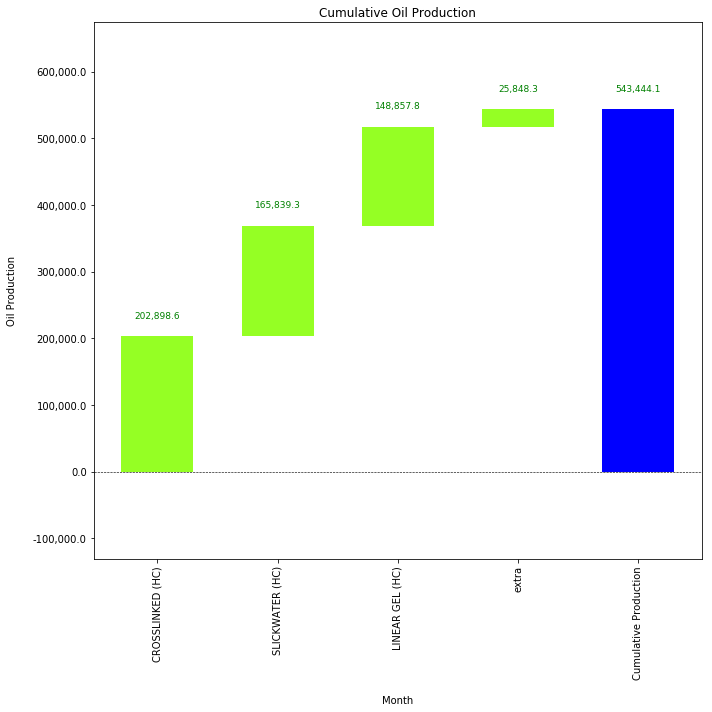

In [15]:
#Print graph 
a = fluid_types
b = total_oilprod
my_plot = waterfall_chart.plot(a, b, rotation_value = 90, sorted_value = True, threshold = 0.2, formatting = "{:,.1f}", net_label = "Cumulative Production", other_label = "extra", Title = "Cumulative Oil Production", x_lab = "Month", y_lab = "Oil Production", blue_color = "blue", green_color = "#95FF24", red_color = 'r')
""" Good for comparing a particular numerical data with a categorical data type """

Frankly, this model does not seem as beneficial and interesting as it had seemed. Even though a waterfall chart produces interesting results, it is utilized more as a visualization tool. It is similar to a Pareto Chart in the sense that it is used to get an overview of data and not as much for estimation.

### Additional Comments  - Review #1 (Sanya)

Very good comparison tool. Keep in mind 